<p></p>
<br />

<div  dir=rtl id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           تمرین سری 2
        </font>
		<p></p>
		<hr>
	</font>
</div>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [3]:
from IPython.core.display import HTML
HTML("<style>.jp-RenderedMarkdown{font-family:'IRANSans,Tahoma,Helvetica,sans-serif';display:flex;flex-direction:column;margin-top:10px;font-size:1rem;direction:rtl}mark{color:inherit;padding:2px; background-color:#88888888}</style>")

<p></p>
<br />
<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
            خواندن داده
        </font>
		<p></p>
		<hr>
داده‌های فایل همراه با کتابخانه <code>sklearn</code> وجود داد
و می‌توانیم به شکل زیر آن‌ها را بخوانیم.
سعی کنید تا قسمت های مربوط به <code>None</code> را کامل کنید
	</font>
</div>

In [13]:
import joblib
from skimage.io import imread
from skimage.transform import resize

def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary,
    together with labels and metadata. The dictionary is written to a pickle file
    named '{pklname}_{width}x{height}px.pkl'.

    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """

    height = height if height is not None else width

    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []

    pklname = f"{pklname}_{width}x{height}px.pkl"
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            # TO DO
            current_path = os.path.join(src, subdir) # current path

            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    # TO DO
                    im = imread(os.path.join(current_path, file)) # read image
                    im = resize(im, (height, width)) # resize to (width, height)
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)

        joblib.dump(data, pklname)

<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        حال مسیر داده را به شکل زیر در سیستم خودتان پیاده کنید.
	</font>
</div>

In [9]:
# TO DO
data_path = "AnimalFace"
os.listdir(data_path)

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DogHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PandaHead',
 'PigeonHead',
 'PigHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        قسمت زیر بدون تغییر باقی بماند.
	</font>
</div>

In [14]:
base_name = 'animal_faces'
width = 80

include = {'ChickenHead', 'BearHead', 'ElephantHead',
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}

resize_all(src=data_path, pklname=base_name, width=width, include=include)

BearHead
ChickenHead
DeerHead
EagleHead
ElephantHead
MonkeyHead
PandaHead


In [21]:
from collections import Counter

data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
# TO DO
# complete lines below with data dictionary above
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', list(set(data['label'])))

Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Deer', 'Panda', 'Elephant', 'Bear', 'Chicken', 'Monkey', 'Eagle']


Counter({'Panda': 117,
         'Bear': 101,
         'Deer': 101,
         'Chicken': 100,
         'Elephant': 100,
         'Monkey': 100,
         'Eagle': 97})


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        لیبل های ازدیکشنری ایجادشده خوانده شوند تا چند تصویر از کلاس های مختلف به شما نشان داده شود.
	</font>
</div>

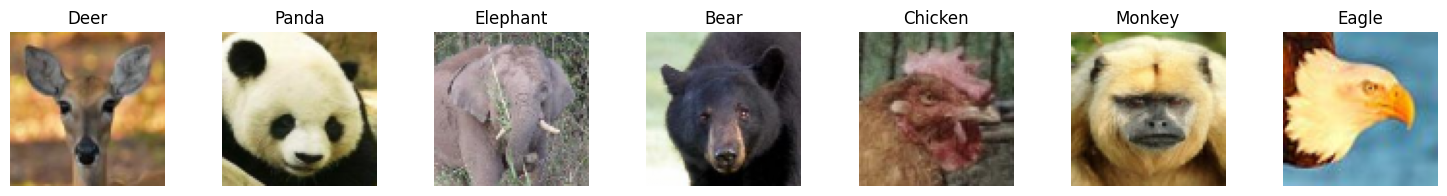

In [23]:
# TO DO
# get all unique values in the list of labels
labels = list(set(data['label']))

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# make a plot for every label (equipment) type. The index method returns the
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)

    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

<p></p>
<br />
<div dir=rtl id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           تقسیم داده ها
        </font>
		<p></p>
		<hr>
	</font>
</div>


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        داده ها با استفاده از <code>data</code> کامل شود. سپس با استفاده  از <code>train_test_split</code>  درصد داده های تست و آموزش انتخاب شود.
	</font>
</div>



```
random_state = 42
test_size = 0.2
```

In [24]:
# TO DO
# fill X and y with data
X = data['data']  # List of images
y = data['label']  # List of labels

In [25]:
from sklearn.model_selection import train_test_split
# TO DO
# create X_train, X_test, y_train, y_test using X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        شهود از داده هایی که انتخاب کرده اید
	</font>
</div>

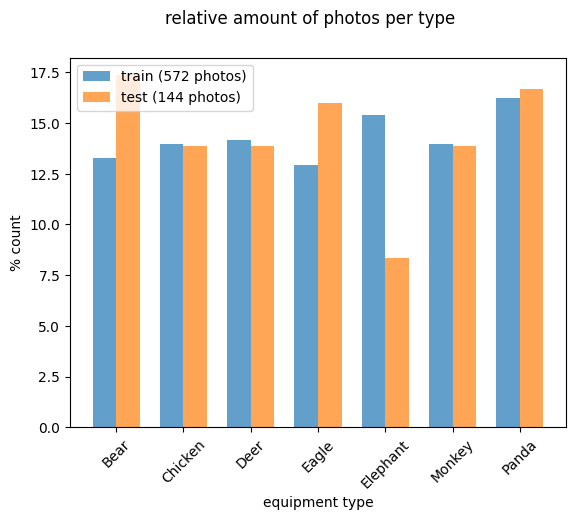

In [27]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5

    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'

    xtemp = np.arange(len(unique))

    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
])

<p></p>
<br />
<div dir=rtl id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           مثال از استخراج ویژگی
        </font>
		<p></p>
		<hr>
	</font>
</div>

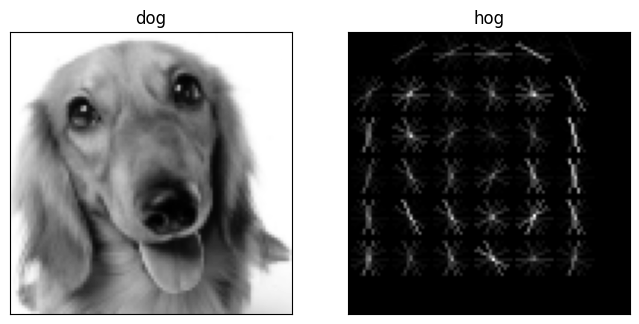

In [28]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
# TO DO
# read one image from your path
dog = imread("AnimalFace/DogHead/dog000012a.jpg", as_gray=True)

# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog,
    pixels_per_cell=(14,14),
    cells_per_block=(2, 2),
    orientations=9,
    visualize=True,
    block_norm='L2-Hys')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]
# TO DO
# plot dog image on ax[0] with title 'dog' and dog hog image on ax[1] with title 'hog'
ax[0].imshow(dog, cmap=plt.cm.gray)
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap=plt.cm.gray)
ax[1].set_title('hog')

plt.show()

In [29]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  9216
number of hog features:  900


<p></p>
<br />
<div id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           Transformers
        </font>
		<p></p>
		<hr>
	</font>
</div>


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        متود <code>transform</code>  هر دو کلاس کامل شود
	</font>
</div>

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        # TO DO
        # return a numpy array of the list of all images in X which are transformed from RGB to Gray
        # Convert a list of RGB images to grayscale
        gray_images = [self.rgb_to_gray(image) for image in X]

        # Stack the grayscale images into a numpy array
        transformed_X = np.array(gray_images)

        return transformed_X
    
    def rgb_to_gray(self, image):
        # Formula to convert RGB to grayscale: Y = 0.299*R + 0.587*G + 0.114*B
        gray_image = np.dot(image[..., :3], [0.299, 0.587, 0.114])
        return gray_image

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            # TO DO
            # fill Nones with values given when initializing HogTransformer object
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try: # TO DO
            # return a numpy array of the list of all images after applying local_hog to them
            hog_list = [local_hog(image) for image in X]
            transformed_X = np.array(hog_list)
            return transformed_X
        except:
            # return a numpy array of the list of all images after applying local_hog to them
            return np.array([])

<p></p>
<br />
<div dir=rtl id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           پردازش داده
        </font>
		<p></p>
		<hr>
	</font>
</div>


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        متغیر های <code>X_train_gray</code> و <code>X_train_hog</code> و <code>X_train_gray</code> کامل شود
	</font>
</div>

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage

# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14),
    cells_per_block=(2,2),
    orientations=9,
    block_norm='L2-Hys'
)
scalify = StandardScaler()

# TO DO
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train) # grayfy. ... ()
X_train_hog = hogify.fit_transform(X_train_gray) # hogify. ...()
X_train_prepared = scalify.fit_transform(X_train_hog) # scalify. ..()

print(X_train_prepared.shape)

(572, 576)


<p></p>
<br />
<div dir=rtl id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           آموزش داده
        </font>
		<p></p>
		<hr>
	</font>
</div>


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        تابع <code>fit</code> کامل شود
	</font>
</div>

In [33]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
# TO DO
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [34]:
SGDClassifier(random_state=42)

SGDClassifier(random_state=42)

<p></p>
<br />
<div dir=rtl id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           ارزیابی مدل
        </font>
		<p></p>
		<hr>
	</font>
</div>


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        متغیر های مربوط به <code>test</code> کامل شود
	</font>
</div>

In [35]:
# TO DO
X_test_gray = grayify.transform(X_test)# grayify. ...()
X_test_hog = hogify.transform(X_test_gray) # hogify. ... ()
X_test_prepared = scalify.transform(X_test_hog)# scalify. ...()


<div DIR=RTL id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
         <code>y_pred</code> کامل شود
	</font>
</div>

In [36]:
# TO DO
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True False  True  True  True  True False  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True]

Percentage correct:  86.11111111111111


<p></p>
<br />
<div id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           Confusion Matrix
        </font>
		<p></p>
		<hr>
	</font>
</div>


<div dir=rtl id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
         <code>cmx</code> کامل شود
	</font>
</div>

In [37]:
from sklearn.metrics import confusion_matrix
# TO DO
cmx = confusion_matrix(y_test, y_pred) # confusion matrix
cmx

array([[21,  0,  1,  0,  2,  1,  0],
       [ 0, 18,  1,  1,  0,  0,  0],
       [ 0,  0, 19,  0,  1,  0,  0],
       [ 0,  2,  0, 17,  0,  2,  2],
       [ 1,  0,  1,  0,  9,  1,  0],
       [ 1,  0,  0,  0,  0, 17,  2],
       [ 1,  0,  0,  0,  0,  0, 23]], dtype=int64)


 ['Bear', 'Chicken', 'Deer', 'Eagle', 'Elephant', 'Monkey', 'Panda']


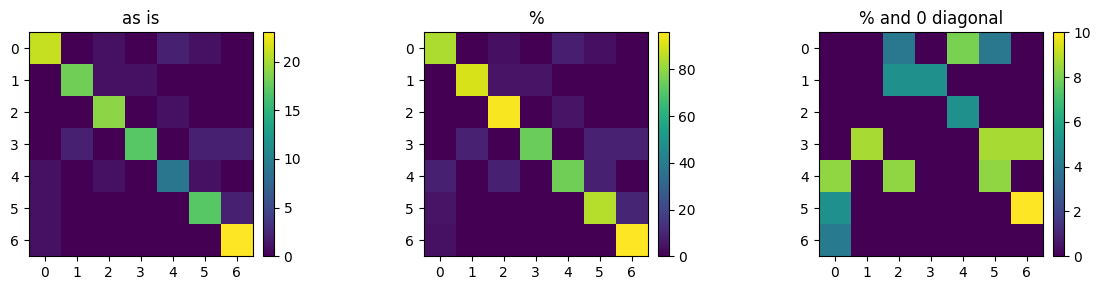

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()

    np.fill_diagonal(cmx_zero_diag, 0)

    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)

    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]

    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')

    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]

    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()

plot_confusion_matrix(cmx)

# the types appear in this order
print('\n', sorted(np.unique(y_test)))